c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


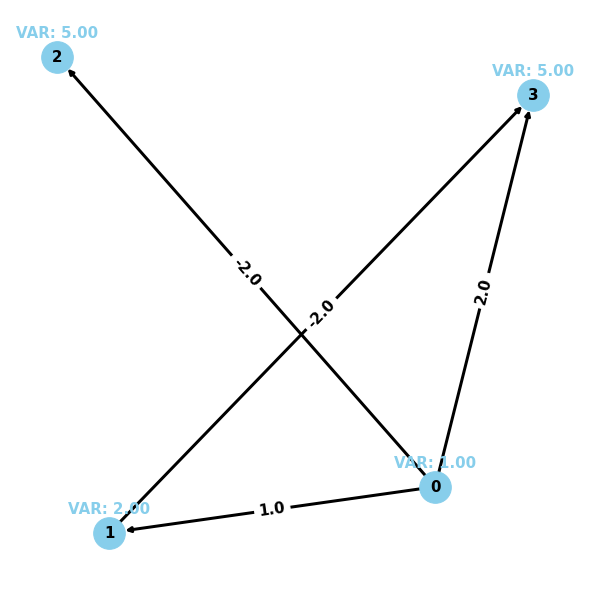

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
from pyvis.network import Network

from DAG import DAG

dag = DAG(n = 4, roots = 1, strength=2, precalculate_paths = True, integer = True)
# dag.mutate().plot()
dag.plot()

In [16]:
from time import time

dag = DAG(n = 50, roots = 1, strength=2, precalculate_paths = False)

t = time()

dats = dag.get_simulated_data_smart(100000)

print("smart", time() - t)


t = time()

dat = dag.get_simulated_data(100000)

print("my", time() - t)



smart 0.26258230209350586
my 0.32912182807922363


In [22]:
dats.var(axis = 0) - dat.var(axis = 1)

array([9.17407415e-03, 1.57306419e-02, 2.56596281e-02, 3.83440244e-02,
       3.72747087e-02, 7.35072713e-02, 1.65125561e-02, 3.35408024e-02,
       6.66883083e-03, 8.02428159e-02, 2.01220897e-01, 2.90014430e+00,
       5.02255118e-01, 3.47639060e-02, 1.17517161e+01, 6.25642291e+01,
       1.93371253e+02, 2.97327472e+02, 8.63056072e+00, 2.84926721e+01,
       7.93074254e+01, 8.71239577e+02, 2.79780441e+01, 2.99478193e+03,
       8.26821910e+02, 2.77572164e+03, 5.06354540e+02, 1.00744535e+04,
       4.37250454e+03, 6.10215443e+04, 1.03132420e+04, 2.89441049e+05,
       8.15237909e+04, 8.32476124e+04, 3.73615254e+04, 1.67929395e+06,
       6.80402852e+06, 4.49684449e+05, 1.76725488e+05, 1.60194990e+07,
       4.62430738e+07, 2.43162106e+06, 1.26071559e+05, 1.01076537e+06,
       3.85494128e+07, 1.86677497e+07, 7.35560211e+07, 2.43468326e+08,
       1.55959229e+06, 3.80228858e+08])

In [ ]:
dats.mean(axis = 0)

In [ ]:
dat.mean(axis = 0)

In [10]:
# dag.precalculate_paths = False

dag = DAG(n = 15, roots = 1, strength=2, precalculate_paths = False, integer = True)
from time import time


N = 100000


t = time()
ana = dag.get_analytical_var()
print("analytical time:", time() - t)

t = time()
sim = dag.get_simulated_var(N)
print("Schauser simulated time:", time() - t)

t = time()
smart = dag.get_smart_var(N)
print("smart time:", time() - t)

print("schauser quality", np.mean(abs(sim-ana)))
print("smart quality", np.mean(abs(sim-smart)))

# for i in range(dag.size):
#     print("simulated", i, ":",round(sim[i]), "| analytical", ":", round(ana[i]))

# print("")
# varsort = dag.get_varsortability(analytical = True, simulated = True, smart=True, N = 100000)
# print("varsortability:", varsort)

analytical time: 10.527721881866455
Schauser simulated time: 0.0799710750579834
smart time: 0.07999634742736816
schauser quality 1210.222683211256
smart quality 1209.340137093404


$V_a = \sum^{nodes}_i\sum_{j,k}\prod^{path_{j}}_j\prod^{path_{ia}}_k W_j W_kV_i + V_a$

In [1]:
from genetic_algorithm import run_genetic_algorithm
from DAG import DAG

dag = DAG(n = 10, roots = 1, strength=2, connectivity = 0.5)
print(dag.adjacency_matrix)
best = run_genetic_algorithm(dag, population = 50, generations = 50, VERBOSE = True)
print(best[0].adjacency_matrix)

[[ 0.          0.76700993 -1.09054113  1.30204315 -0.93335279  0.66066074
   0.          0.         -0.79540751  0.68454468]
 [ 0.          0.         -1.42538888  0.84799554  0.91693521  0.
  -0.87799592  1.04798794  0.93932238  0.        ]
 [ 0.          0.          0.          1.2757698   0.          0.
   1.31518473 -1.80080011  0.          0.        ]
 [ 0.          0.          0.          0.         -1.41415918  0.
   0.          0.         -0.72576429 -1.24290893]
 [ 0.          0.          0.          0.          0.         -1.4198107
   0.          1.5328836   0.         -1.55869787]
 [ 0.          0.          0.          0.          0.          0.
   1.01107375  0.          0.          1.92509147]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.         -1.36262696]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.         -1.20251813 -1.81349501]
 [ 0.          0.          0.          0.        

KeyboardInterrupt: 

N 7
N 7
smart:  7
N 5
N 5
smart:  5
N 7
N 7
smart:  7
N 4
N 4
smart:  4
N 5
N 5
smart:  5
N 5
N 5
smart:  5
WTH
521.0 162.0
N 11
WTH
519.4980829474292 161.92397146874146
N 11
smart:  10


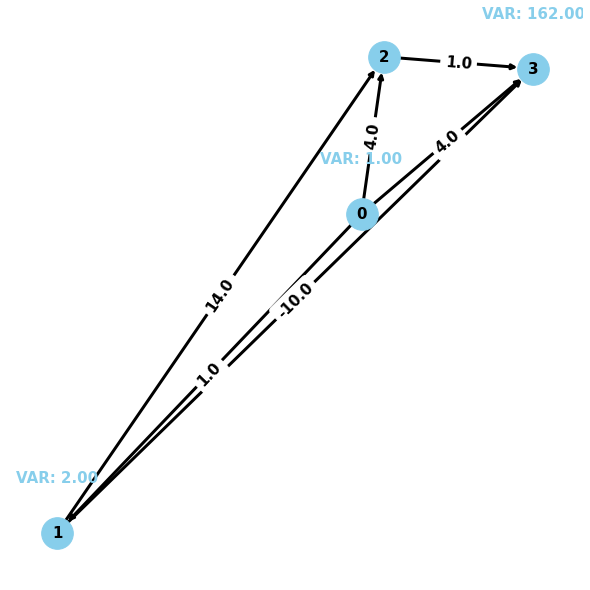

{'analytical': 0.9090909090909091, 'simulated': 0.9090909090909091, 'smart': 0.9}
N 3
N 3
smart:  3
N 5
N 5
smart:  5
N 10
N 10
smart:  9


In [19]:
for i in range(10):
    rand_dag = DAG(n = 4, roots = 1, strength = 15, precalculate_paths = False, integer = True)

    vs = rand_dag.get_varsortability(analytical = True, simulated = True, smart = True,  N = 100000)
    if not (vs["analytical"] == vs["simulated"] and vs["analytical"] == vs["smart"]):
        rand_dag.plot()
        print(vs)

In [5]:
from genetic_algorithm import run_genetic_algorithm




run_genetic_algorithm(dag, VERBOSE=1, population = 20, generations = 50, continous=0, flip_only=1)
# dag.plot()


generation 0
varsortability: {'smart': 1.0}
continous_varsortability: {'smart': 5.489482267784224}

generation 1


AttributeError: 'numpy.ndarray' object has no attribute 'get_varsortability'

In [112]:
ways = np.zeros((dag.size, dag.size))
for i in range(dag.size):
    # multiply differnt powers of the matrix
    ways += np.linalg.matrix_power(dag.adjacency_matrix, i)


print("out\n",ways.sum(axis = 1))

print("in\n",ways.sum(axis = 0))


ss = ways.sum(axis = 0) + ways.sum(axis = 1)

print("sum\n", ss)

print("TOP N TO MAX:")
print(np.where([sum(ss[:i])> sum(ss[i:]) for i in range(len(ss))])[0][0])



out
 [38. 14.  3.  2.  1.  1.]
in
 [ 1.  3.  9.  7. 25. 14.]
sum
 [39. 17. 12.  9. 26. 15.]
TOP N TO MAX:
3


In [107]:
from tqdm.notebook import tqdm

tot_n = n*(n-1)//2


dag = DAG(n = n, roots = 1, strength = 5, precalculate_paths = False, adjacency_matrix=random_fully_connected_adj, integer = True)

getpos = lambda x: list(zip(*np.where(np.triu(np.ones((n,n)), 1) - np.eye(n)== 1)))[x]


best = dag.get_varsortability(analytical = True)["analytical"]
best_adj = dag.adjacency_matrix.copy()
best_vars = dag.get_analytical_var()


ac = list(all_combinations(range(tot_n), tot_n))
for c in tqdm(ac, total = len(ac)):
    adj = dag.adjacency_matrix.copy()
    for pos in c:
        i,j = getpos(pos)

        adj[i,j] *= -1

    newdag = DAG(n = n, roots = 1, strength = 5, precalculate_paths = False, adjacency_matrix=adj, integer = True)
    vs = newdag.get_varsortability(smart = True, N = 100000)["smart"]

    if vs < best:
        best = vs
        best_vars = newdag.get_analytical_var()
        best_adj = adj.copy()
        print("new best:", best)
        print(c)
        print("")

print("best:", best)
print(best_adj)
print(best_vars)

  0%|          | 0/1023 [00:00<?, ?it/s]

new best: 0.9285714285714286
(9,)

best: 0.9285714285714286
[[ 0  2  1  2  2]
 [ 0  0  0  2  2]
 [ 0  0  0  1  2]
 [ 0  0  0  0 -2]
 [ 0  0  0  0  0]]
[ 1.  5.  2. 55. 45.]


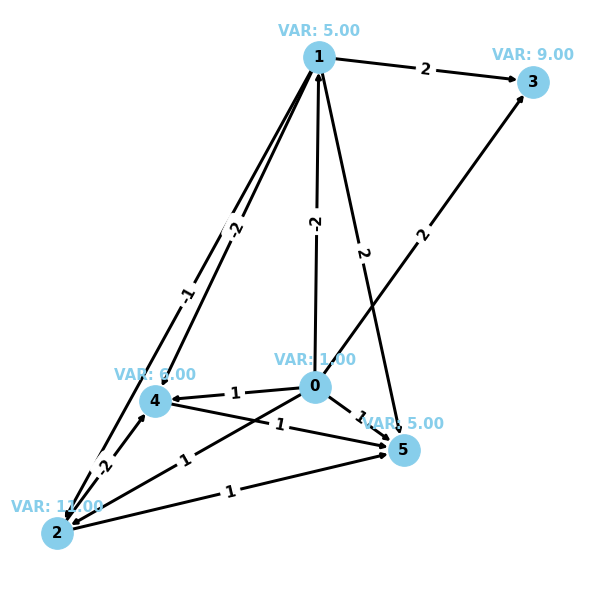

In [46]:
better = best_adj.copy()

better[1,3] = 2

dag = DAG(n = n, roots = 1, strength = 5, precalculate_paths = False, adjacency_matrix=better, integer = True)


dag.plot()

c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


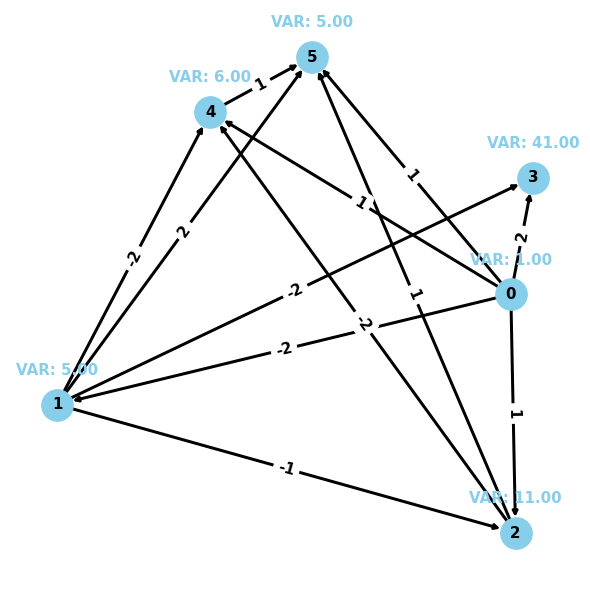

In [39]:
dag.plot()

In [10]:
newdag.get_analytical_var() == best_vars

array([ True,  True, False, False, False])

In [151]:
print(newdag.adjacency_matrix ,"\n", best_adj)

[[ 0.          1.86453816 -0.94543854  1.93616622 -0.72639995]
 [ 0.          0.          0.6838726  -1.63762585  0.70086407]
 [ 0.          0.          0.          1.3336376  -1.7571076 ]
 [ 0.          0.          0.          0.          0.73874099]
 [ 0.          0.          0.          0.          0.        ]] 
 [[ 0.         -1.86453816 -0.94543854  1.93616622  0.72639995]
 [ 0.          0.         -0.6838726   1.63762585  0.70086407]
 [ 0.          0.          0.          1.3336376   1.7571076 ]
 [ 0.          0.          0.          0.         -0.73874099]
 [ 0.          0.          0.          0.          0.        ]]


In [97]:
best_vars

array([ 1.        ,  2.14122516, 14.24565439, 10.39260993,  4.45271735])

In [31]:
from time import time
t = time()


for _ in range(100):
    d = DAG(n = 6, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj).get_varsortability(analytical = False, simulated = True, N = 100000)["simulated"]

print("time:", time() - t)

t = time()

for _ in range(100):
    d = DAG(n = 6, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj).get_varsortability(analytical = True, simulated = False)["analytical"]

print("time:", time() - t)

time: 3.2647793292999268
time: 2.5968685150146484


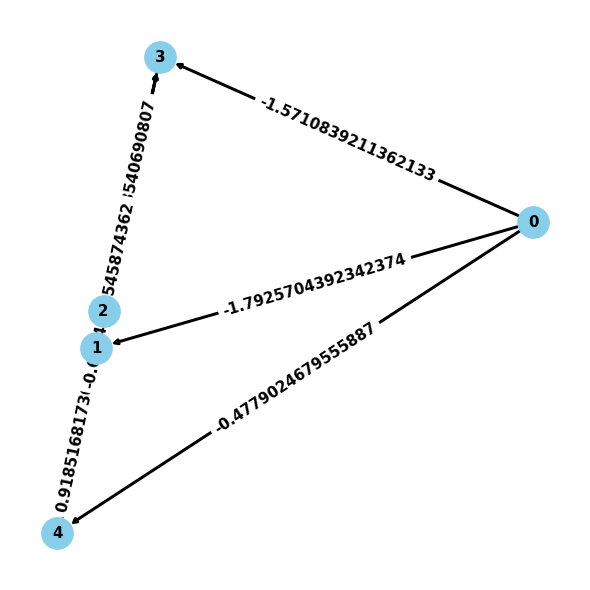

[[ 0.         -1.79257044  0.         -1.57108392 -0.47790247]
 [ 0.          0.         -1.61055881  0.63262079  1.4691218 ]
 [ 0.          0.          0.          0.68154354  0.91851682]
 [ 0.          0.          0.          0.         -0.62841065]
 [ 0.          0.          0.          0.          0.        ]]
{'analytical': 0.5454545454545454, 'simulated': 0.5454545454545454}
{'analytical': 3.4433323627139196, 'simulated': 3.444709527491217}


In [110]:
ad = np.zeros_like(start_adj)
ad[start_adj == 1] = np.array(best[0])

dag = DAG(n = 5, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = ad)
dag.plot()
print(ad)

print(dag.get_varsortability(analytical=True, simulated=True, N = 100000))

print(dag.get_continous_varsortability(analytical = True, simulated = True, N = 1000000))

In [113]:
rolls = np.random.randint(0, 6, 100000)
rolls3 = np.random.randint(0, 6, (100000,3))


for i in range(10):
    print("Armor", i)

    hits = rolls >= i